# 데이터 세트 개요
- 출처: Kaggle – UCI ML 저장소 기반 데이터셋
  - 링크: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 목적: 생체 지표를 바탕으로 당뇨병 발병 여부를 예측하는 이진 분류 문제
- 피마 인디언 당뇨병 데이터 세트의 구성:
  - Pregnancies: 임신 횟수
  - Glucose: 포도당 부하 검사 수치
  - BloodPressure: 혈압 (mm Hg)
  - SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
  - Insulin: 헐청 인슐린
  - BMI: 체질량 지수
  - DiabetesPedigreeFunction: 당뇨 내력 가중치 값
  - Age: 나이
  - Outcome: 클래스 결정값 (0또는 1)

# Step 1: 데이터 확인

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


**해석**: 전체 768개의 데이터 중에서 Negative(당뇨 없음): 500개, Positive(당뇨 있음): 268개

In [14]:
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**해석**: Null값이 없고 피처의 타입은 모두 숫자형 -> 인코딩 필요하지 않아 보인다


# Step 2: 로지스틱 회귀를 이용해 예측 모델 생성

- 오차 행렬, 정확도, 정밀도, 재현율, F1, ROC-AUC 출력 함수

In [12]:
# get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

- threshold에 따라 정밀도/재현율의 변화를 시각화해 주는 함수

In [11]:
#precision_recall_curve_plot() 함수
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [9]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,    F1: 0.6465, AUC:0.8083


**해석**:

- 이 데이터는 Negative가 약 65%로 클래스 불균형이므로 정확도 77.27%는 과대평가될 수 있다(모두 Negative로 찍어도 ≈65%). 

- 의료에서 False Negative은 위험하므로 재현율(59.26%)을 더 끌어올리는 것이 중요하다. 그래서 정확도보다는 재현율(Positive 놓침을 얼마나 줄였는가)에 더 초점을 둔다.

# Step 3: 임곗값 조정

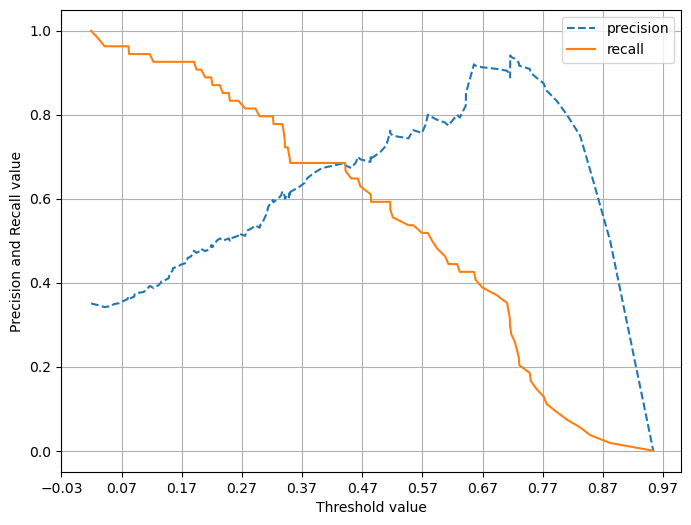

In [15]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 그래프 해석: 임계값을 약 0.42로 두면 정밀도 & 재현율이 대략 비슷한 수준으로 맞춰진다
  
- 하지만 한계: 그 지점에서도 두 지표 모두 < 0.7 → 모델 성능이 아직 전반적으로 낮다

- 주의점: 임계값만 내리면 재현율↑ 대신 정밀도↓가 커질 수 있다(트레이드오프)

--> 임곗값을 더 만지기 전에 데이터 품질부터 확인한다

df.describe()로 피처 분포/요약통계 점검

In [18]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- `diabetes_data.describe()`를 보면 여러 피처의 최솟값(min) 이 0으로 나온다. 그런데 Glucose(포도당 수치) 는 생리적으로 0이 될 수 없다
- 실제로 히스토그램을 그려보면 0이 꽤 많이 분포해 있는 것을 확인할 수 있다

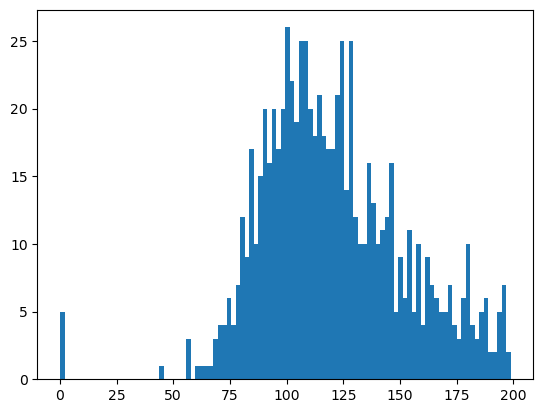

In [19]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

- 피처들에서 비현실적인 0 값을 점검한다: Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [22]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


- SkinThickness(29.56%)와 Insulin(48.7%)에 0값이 매우 많아 삭제 시 표본이 크게 줄므로 0을 평균 값으로 보고 대치한 뒤 학습하겠습니다

In [23]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

- 스케일링 적용

In [28]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


- 위에 output을 보면 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선된 것을 확인할 수 있다

In [31]:
# get_evel_by_threshold() 함수
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

- 임계값을 0.30~0.50까지 0.03 간격으로 변경해 보며 get_eval_by_threshold()로 재현율 등 평가 지표의 개선 정도를 확인한다.

In [30]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,    F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


- 임켓값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임켓값으 로 보인다 (F1도 제일 높다)

In [32]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])


오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433


# 결론

## 1. 실습 결과
- **기본 임계값 0.5 (전처리 전/기본 설정)**
    - 오차행렬: [[87 13],[22 32]] (TN=87, FP=13, FN=22, TP=32)
    - 정확도 0.7727 · 정밀도 0.7111 · 재현율 0.5926 · F1 0.6465 · AUC 0.8083
- **임계값 0.48로 하향(전처리, 스케일링 후 적용)**
    - 오차행렬: [[88 12],[19 35]] (TN=88, FP=12, FN=19, TP=35)
    - 정확도 0.7987 · 정밀도 0.7447 · 재현율 0.6481 · F1 0.6931 · AUC 0.8433

## 2. 의미

- 검출된 환자 수 증가: **TP** 32 → 35 (+3)
- 놓침 감소: **FN** 22 → 19 (−3)
- 오경보도 소폭 감소: **FP** 13 → 12 (−1)

핵심 지표 모두 개선: 정확도, 정밀도, 재현율, F1, AUC 상승

--> **이번 실습을 통해 정확도만 보지 말고 정밀도, 재현율, F1, PR 곡선을 함께 확인하고, 과업 목표(의료는 재현율 우선)에 맞춰 임계값을 최적화하는 것이 중요함을 확인했다**
